In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


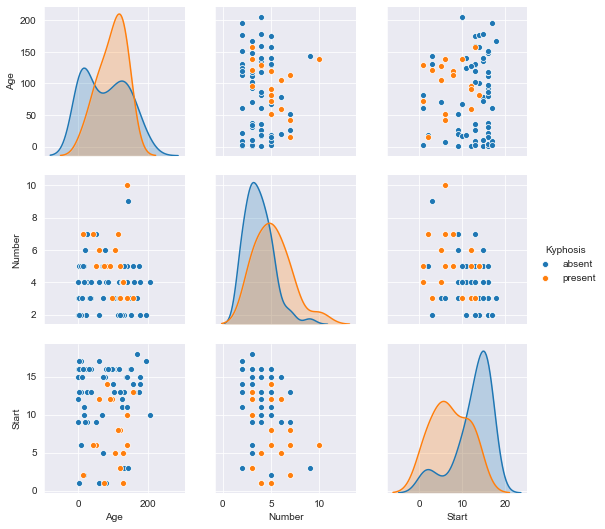

In [9]:
sns.set_style('darkgrid')
sns.pairplot(df, hue='Kyphosis')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Kyphosis', axis=1)

In [12]:
y = df['Kyphosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[18  2]
 [ 2  3]]
              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=200)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[19  1]
 [ 3  2]]
              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        20
     present       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25

